In [1]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from pandas import read_csv

import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import collections
%matplotlib inline

Using TensorFlow backend.
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jocelyn/opt/anaconda3/lib/pytho

# standardization

In [4]:
path = glob.glob('../TrafficNet/VolvoData/2019/*.csv')

X_all = np.empty((1, 88))
Y_all = np.empty((1,))

for i in range(len(path)):
    print(i)
    
    CutIn = pd.read_csv(path[i], usecols=['Lat','Long','Acceleration','Decelerating','Indicator','InReverse','Lane','PositionInLane','Velocity','YawRate','PosLgt1','PosLgt2','PosLgt3','PosLgt4','PosLgt5','PosLgt6','PosLgt7','PosLat1','PosLat2','PosLat3','PosLat4','PosLat5','PosLat6','PosLat7','VelLgt1','VelLgt2','VelLgt3','VelLgt4','VelLgt5','VelLgt6','VelLgt7','VelLat1','VelLat2','VelLat3','VelLat4','VelLat5','VelLat6','VelLat7','AccLgt1','AccLgt2','AccLgt3','AccLgt4','AccLgt5','AccLgt6','AccLgt7','AccLat1','AccLat2','AccLat3','AccLat4','AccLat5','AccLat6','AccLat7','Angle1','Angle2','Angle3','Angle4','Angle5','Angle6','Angle7','Type1','Type2','Type3','Type4','Type5','Type6','Type7','Id1','Id2','Id3','Id4','Id5','Id6','Id7','Lane1','Lane2','Lane3','Lane4','Lane5','Lane6','Lane7','PositionInLane1','PositionInLane2','PositionInLane3','PositionInLane4','PositionInLane5','PositionInLane6','PositionInLane7','Lead','CutIn'])
    CutIn.fillna(-1, inplace=True)
    
    Y_train = np.array(CutIn['CutIn'].values)
    X_train = np.array(CutIn[['Lat','Long','Acceleration','Decelerating','Indicator','InReverse','Lane','PositionInLane','Velocity','YawRate','PosLgt1','PosLgt2','PosLgt3','PosLgt4','PosLgt5','PosLgt6','PosLgt7','PosLat1','PosLat2','PosLat3','PosLat4','PosLat5','PosLat6','PosLat7','VelLgt1','VelLgt2','VelLgt3','VelLgt4','VelLgt5','VelLgt6','VelLgt7','VelLat1','VelLat2','VelLat3','VelLat4','VelLat5','VelLat6','VelLat7','AccLgt1','AccLgt2','AccLgt3','AccLgt4','AccLgt5','AccLgt6','AccLgt7','AccLat1','AccLat2','AccLat3','AccLat4','AccLat5','AccLat6','AccLat7','Angle1','Angle2','Angle3','Angle4','Angle5','Angle6','Angle7','Type1','Type2','Type3','Type4','Type5','Type6','Type7','Id1','Id2','Id3','Id4','Id5','Id6','Id7','Lane1','Lane2','Lane3','Lane4','Lane5','Lane6','Lane7','PositionInLane1','PositionInLane2','PositionInLane3','PositionInLane4','PositionInLane5','PositionInLane6','PositionInLane7','Lead']])
    # Get dimensions of input and output
    #dimof_output = int(np.max(Y_train) + 1)
    dimof_output = 1
    dimof_input = X_train.shape[1]

    # Scale/whiten the X data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #print(len(X_train))
    print(X_train.shape, Y_train.shape)
    
    X_all = np.append(X_all, X_train, axis=0)
    Y_all = np.append(Y_all, Y_train, axis=0)

0
(97434, 88) (97434,)
1
(46362, 88) (46362,)
2
(56119, 88) (56119,)
3
(107451, 88) (107451,)
4
(54506, 88) (54506,)
5
(56795, 88) (56795,)
6
(54873, 88) (54873,)
7
(139583, 88) (139583,)
8
(95999, 88) (95999,)
9
(93916, 88) (93916,)
10
(67954, 88) (67954,)
11
(70547, 88) (70547,)
12
(142409, 88) (142409,)
13
(32138, 88) (32138,)


In [5]:
len(X_all)

1116087

In [6]:
X_all = X_all[1:1116087]
Y_all = Y_all[1:1116087]

# Feature selection

## ANOVA f-test Feature Selection

In [11]:
# example of anova f-test feature selection for numerical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

In [12]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 105.125323
Feature 1: 84.472824
Feature 2: 55.359863
Feature 3: 4.396479
Feature 4: 18.563934
Feature 5: 0.471025
Feature 6: 934.559849
Feature 7: 476.542188
Feature 8: 466.239602
Feature 9: 21.847455
Feature 10: 120.005507
Feature 11: 490.904250
Feature 12: 499.581716
Feature 13: 401.627605
Feature 14: 184.721948
Feature 15: 6.221834
Feature 16: 86.492656
Feature 17: 32.484388
Feature 18: 138.485958
Feature 19: 82.305227
Feature 20: 228.483060
Feature 21: 35.792907
Feature 22: 7.347584
Feature 23: 86.761729
Feature 24: 3969.100841
Feature 25: 2140.612995
Feature 26: 1017.039243
Feature 27: 361.181105
Feature 28: 89.552175
Feature 29: 10.574436
Feature 30: 86.800660
Feature 31: 622.616121
Feature 32: 304.831461
Feature 33: 327.589128
Feature 34: 340.045956
Feature 35: 158.576511
Feature 36: 3.432030
Feature 37: 84.347584
Feature 38: 2225.580819
Feature 39: 1107.598834
Feature 40: 550.260468
Feature 41: 305.863006
Feature 42: 55.353669
Feature 43: 10.620026
Feature 44: 87.636

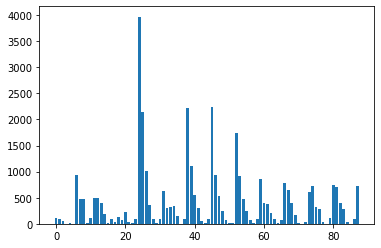

In [13]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=0.5, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

## Mutual Information Feature Selection

In [9]:
# example of mutual information feature selection for numerical input data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

In [ ]:
# feature selection
def Mutual_select_features(X_train, y_train, X_test):
	# configure to select all features
	fsm = SelectKBest(score_func=mutual_info_classif, k='all')
	# learn relationship from training data
	fsm.fit(X_train, y_train)
	# transform train input data
	X_train_fsm = fsm.transform(X_train)
	# transform test input data
	X_test_fsm = fsm.transform(X_test)
	return X_train_fsm, X_test_fsm, fsm

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=0.5, random_state=1)
# feature selection
X_train_fsm, X_test_fsm, fsm = Mutual_select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fsm.scores_)):
	print('Feature %d: %f' % (i, fsm.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fsm.scores_))], fsm.scores_)
pyplot.show()

# Modeling With Selected Features

## Model Built Using All Features

In [15]:
# evaluation of a model using all input features
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# split into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 98.01


## Model Built Using ANOVA f-test Features

In [16]:
# evaluation of a model using 4 features chosen with anova f-test
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features >400
	fs = SelectKBest(score_func=f_classif, k=29)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat_anova = model.predict(X_test_fs)
# evaluate predictions
accuracy_anova = accuracy_score(y_test, yhat_anova)
print('Accuracy: %.2f' % (accuracy_anova*100))

Accuracy: 98.00


## Tune the Number of Selected Features

In [2]:
from pandas import read_csv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [3]:
path = glob.glob('../TrafficNet/VolvoData/2019/*.csv')

X_all = np.empty((1, 88))
Y_all = np.empty((1,))

for i in range(5):
    print(i)
    
    CutIn = pd.read_csv(path[i], usecols=['Lat','Long','Acceleration','Decelerating','Indicator','InReverse','Lane','PositionInLane','Velocity','YawRate','PosLgt1','PosLgt2','PosLgt3','PosLgt4','PosLgt5','PosLgt6','PosLgt7','PosLat1','PosLat2','PosLat3','PosLat4','PosLat5','PosLat6','PosLat7','VelLgt1','VelLgt2','VelLgt3','VelLgt4','VelLgt5','VelLgt6','VelLgt7','VelLat1','VelLat2','VelLat3','VelLat4','VelLat5','VelLat6','VelLat7','AccLgt1','AccLgt2','AccLgt3','AccLgt4','AccLgt5','AccLgt6','AccLgt7','AccLat1','AccLat2','AccLat3','AccLat4','AccLat5','AccLat6','AccLat7','Angle1','Angle2','Angle3','Angle4','Angle5','Angle6','Angle7','Type1','Type2','Type3','Type4','Type5','Type6','Type7','Id1','Id2','Id3','Id4','Id5','Id6','Id7','Lane1','Lane2','Lane3','Lane4','Lane5','Lane6','Lane7','PositionInLane1','PositionInLane2','PositionInLane3','PositionInLane4','PositionInLane5','PositionInLane6','PositionInLane7','Lead','CutIn'])
    CutIn.fillna(-1, inplace=True)
    
    Y_train = np.array(CutIn['CutIn'].values)
    X_train = np.array(CutIn[['Lat','Long','Acceleration','Decelerating','Indicator','InReverse','Lane','PositionInLane','Velocity','YawRate','PosLgt1','PosLgt2','PosLgt3','PosLgt4','PosLgt5','PosLgt6','PosLgt7','PosLat1','PosLat2','PosLat3','PosLat4','PosLat5','PosLat6','PosLat7','VelLgt1','VelLgt2','VelLgt3','VelLgt4','VelLgt5','VelLgt6','VelLgt7','VelLat1','VelLat2','VelLat3','VelLat4','VelLat5','VelLat6','VelLat7','AccLgt1','AccLgt2','AccLgt3','AccLgt4','AccLgt5','AccLgt6','AccLgt7','AccLat1','AccLat2','AccLat3','AccLat4','AccLat5','AccLat6','AccLat7','Angle1','Angle2','Angle3','Angle4','Angle5','Angle6','Angle7','Type1','Type2','Type3','Type4','Type5','Type6','Type7','Id1','Id2','Id3','Id4','Id5','Id6','Id7','Lane1','Lane2','Lane3','Lane4','Lane5','Lane6','Lane7','PositionInLane1','PositionInLane2','PositionInLane3','PositionInLane4','PositionInLane5','PositionInLane6','PositionInLane7','Lead']])
    # Get dimensions of input and output
    #dimof_output = int(np.max(Y_train) + 1)
    dimof_output = 1
    dimof_input = X_train.shape[1]

    # Scale/whiten the X data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #print(len(X_train))
    print(X_train.shape, Y_train.shape)
    
    X_all = np.append(X_all, X_train, axis=0)
    Y_all = np.append(Y_all, Y_train, axis=0)

0
(97434, 88) (97434,)
1
(46362, 88) (46362,)
2
(56119, 88) (56119,)
3
(107451, 88) (107451,)
4
(54506, 88) (54506,)


In [4]:
len(X_all)

361873

In [5]:
X_all = X_all[1:361873]
Y_all = Y_all[1:361873]

In [6]:
# compare different numbers of features selected using anova f-test


# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear')
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X_all.shape[1])]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X_all, Y_all)
# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5 16 23 30 37 44 58 65 72 79 86] are constant.
  UserWarning)
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Best Mean Accuracy: 0.954
Best Config: {'anova__k': 28}


>1 0.954 (0.000)
>2 0.954 (0.000)
>3 0.954 (0.000)
>4 0.954 (0.000)
>5 0.954 (0.000)
>6 0.954 (0.000)
>7 0.954 (0.000)
>8 0.954 (0.000)
>9 0.954 (0.000)
>10 0.954 (0.000)
>11 0.954 (0.000)
>12 0.954 (0.000)
>13 0.954 (0.000)
>14 0.954 (0.000)
>15 0.954 (0.000)
>16 0.954 (0.000)
>17 0.954 (0.000)
>18 0.954 (0.000)
>19 0.954 (0.000)
>20 0.954 (0.000)
>21 0.954 (0.000)
>22 0.954 (0.000)
>23 0.954 (0.000)
>24 0.954 (0.000)
>25 0.954 (0.000)
>26 0.954 (0.000)
>27 0.954 (0.000)
>28 0.954 (0.000)
>29 0.954 (0.000)
>30 0.954 (0.000)
>31 0.954 (0.000)
>32 0.954 (0.000)
>33 0.954 (0.000)
>34 0.954 (0.000)
>35 0.954 (0.000)
>36 0.954 (0.000)
>37 0.954 (0.000)
>38 0.954 (0.000)
>39 0.954 (0.000)
>40 0.954 (0.000)
>41 0.954 (0.000)
>42 0.954 (0.000)
>43 0.954 (0.000)
>44 0.954 (0.000)
>45 0.954 (0.000)
>46 0.954 (0.000)
>47 0.953 (0.000)
>48 0.953 (0.000)
>49 0.954 (0.000)
>50 0.954 (0.000)
>51 0.954 (0.000)
>52 0.954 (0.000)
>53 0.954 (0.000)
>54 0.954 (0.000)
>55 0.954 (0.000)
>56 0.954 (0.000)
>

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


>68 0.954 (0.000)
>69 0.954 (0.000)
>70 0.954 (0.000)
>71 0.954 (0.000)
>72 0.954 (0.000)
>73 0.954 (0.000)
>74 0.954 (0.000)
>75 0.954 (0.000)
>76 0.954 (0.000)
>77 0.954 (0.000)
>78 0.954 (0.000)
>79 0.954 (0.000)


/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


>80 0.954 (0.000)
>81 0.954 (0.000)
>82 0.954 (0.000)
>83 0.954 (0.000)
>84 0.954 (0.000)
>85 0.954 (0.000)
>86 0.954 (0.000)
>87 0.954 (0.000)
>88 0.954 (0.000)


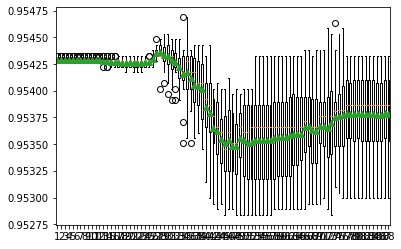

In [7]:
# compare different numbers of features selected using anova f-test


# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_all, Y_all, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define number of features to evaluate
num_features = [i+1 for i in range(X_all.shape[1])]
# enumerate each number of features
results = list()
for k in num_features:
	# create pipeline
	model = LogisticRegression(solver='liblinear')
	fs = SelectKBest(score_func=f_classif, k=k)
	pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
	# evaluate the model
	scores = evaluate_model(pipeline)
	results.append(scores)
	# summarize the results
	print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()

In [70]:
pyplot.savefig('boxplot.png',bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

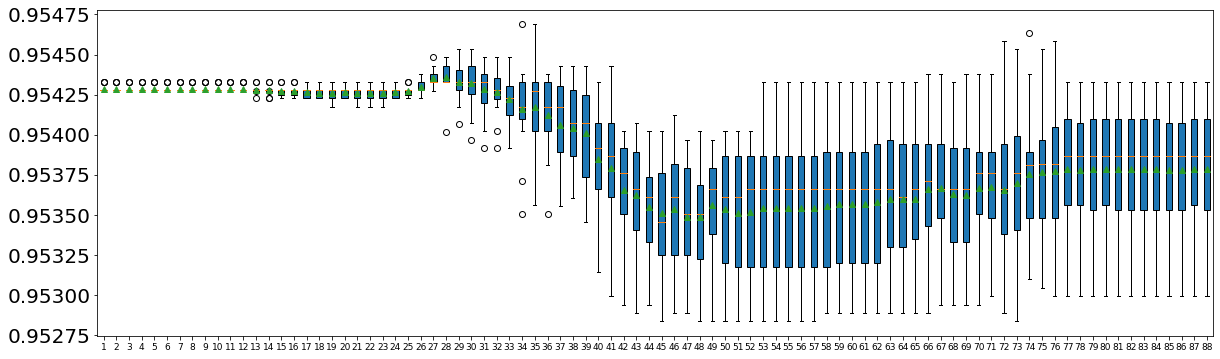

In [12]:
pyplot.figure(figsize=(20,6))
pyplot.boxplot(results, labels=num_features, showmeans=True, patch_artist=True)
pyplot.xticks(fontsize=9)
pyplot.yticks(fontsize=20)
pyplot.show()

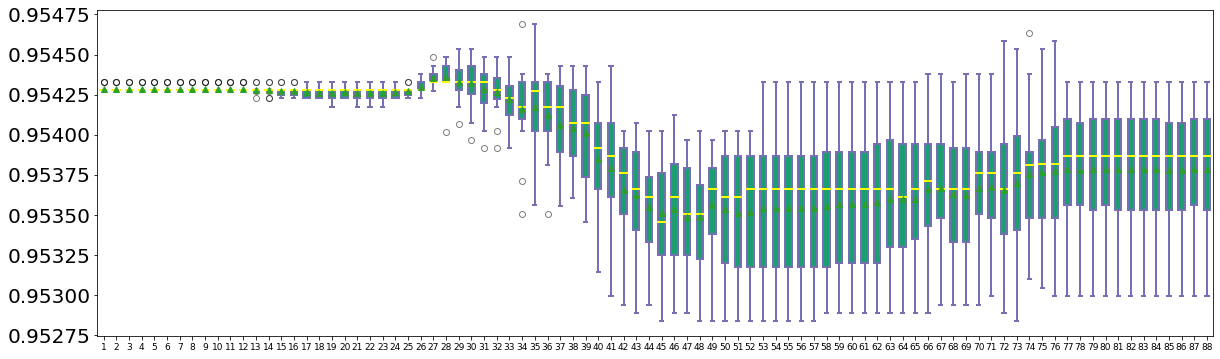

In [11]:
pyplot.figure(figsize=(20,6))
pyplot.xticks(fontsize=9)
pyplot.yticks(fontsize=20)

bp = pyplot.boxplot(results, labels=num_features, showmeans=True, patch_artist=True)
#ax = fig.add_subplot(111)
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e70' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='yellow', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

## the final 28 features

In [6]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k=28)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 495.062521
Feature 1: 326.535655
Feature 2: 1.760106
Feature 3: 0.941693
Feature 4: 6.004378
Feature 5: 1.278721
Feature 6: 465.795677
Feature 7: 164.186153
Feature 8: 324.125064
Feature 9: 0.298129
Feature 10: 0.038193
Feature 11: 193.080350
Feature 12: 244.622972
Feature 13: 38.451299
Feature 14: 35.398625
Feature 15: 0.036040
Feature 16: 0.101694
Feature 17: 0.018312
Feature 18: 3.908238
Feature 19: 9.185823
Feature 20: 1.324230
Feature 21: 2.945601
Feature 22: 24.002629
Feature 23: 0.099572
Feature 24: 1704.379395
Feature 25: 769.886622
Feature 26: 430.732195
Feature 27: 66.462847
Feature 28: 33.298152
Feature 29: 0.011443
Feature 30: 0.094722
Feature 31: 16.911075
Feature 32: 37.948015
Feature 33: 173.597003
Feature 34: 4.673381
Feature 35: 2.323235
Feature 36: 9.476983
Feature 37: 0.092364
Feature 38: 1235.182205
Feature 39: 484.910089
Feature 40: 301.082066
Feature 41: 34.665145
Feature 42: 7.928305
Feature 43: 0.026193
Feature 44: 0.094482
Feature 45: 1249.281655
Fea

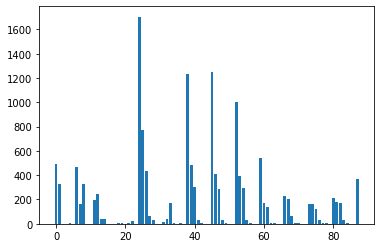

In [7]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=0.5, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [8]:
fs.get_support(indices=True)

array([ 0,  1,  6,  8, 11, 12, 24, 25, 26, 33, 38, 39, 40, 45, 46, 47, 52,
       53, 54, 59, 60, 66, 67, 73, 80, 81, 82, 87])

1,2,7,9,12,13,25-27,34,39-41,46-48,53-55,60,61,67,68,74,81,82,83,88
'Lat','Long','Lane','Velocity','PosLgt2','PosLgt3','VelLgt1','VelLgt2','VelLgt3','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Id1','Id2','Lane1','PositionInLane1','PositionInLane2','PositionInLane3','Lead'

       
'Lat','Long',
'Acceleration','Decelerating','Indicator','InReverse','Lane','PositionInLane','Velocity','YawRate','PosLgt1','PosLgt2','PosLgt3',
'PosLgt4','PosLgt5','PosLgt6','PosLgt7','PosLat1','PosLat2','PosLat3','PosLat4','PosLat5','PosLat6','PosLat7','VelLgt1','VelLgt2','VelLgt3',
'VelLgt4','VelLgt5','VelLgt6','VelLgt7','VelLat1','VelLat2','VelLat3','VelLat4',
'VelLat5','VelLat6','VelLat7','AccLgt1','AccLgt2','AccLgt3','AccLgt4',
'AccLgt5','AccLgt6','AccLgt7','AccLat1','AccLat2','AccLat3','AccLat4',
'AccLat5','AccLat6','AccLat7','Angle1','Angle2','Angle3','Angle4',
'Angle5','Angle6','Angle7','Type1','Type2','Type3',
'Type4','Type5','Type6','Type7','Id1','Id2','Id3','Id4','Id5','Id6','Id7','Lane1','Lane2','Lane3','Lane4','Lane5','Lane6','Lane7','PositionInLane1','PositionInLane2','PositionInLane3','PositionInLane4','PositionInLane5','PositionInLane6','PositionInLane7','Lead']])
           

# Train model

In [2]:
# Set up a 'look back' dataset for sequence to label prediction with Keras.

# The LSTM network expects the input data (X) to be provided with a specific
# array structure in the form of: [samples, time steps, features].

# create_dataset is adapted from
# http://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

def create_dataset(X, Y, **options):
    """Convert an array of X, Y values into a dataset matrix for and LSTM"""
    
    look_back = options.pop('look_back', None)
    dataX, dataY = [], []
    for i in range(len(X) - look_back):
        a = X[i:(i+look_back)]
        dataX.append(a)
        dataY.append(Y[i + look_back - 1])
    return np.array(dataX), np.array(dataY)

# Predictions will be based on look_back minutes of data:
look_back = 50

 0,  1,  6,  8, 11, 12, 13, 24, 25, 26, 27, 32, 33, 38, 39, 40, 41,
       45, 46, 47, 52, 53, 54, 59, 60, 61, 66, 67, 68, 74, 75, 81, 82, 87
'Lat','Long','Lane','Velocity','PosLgt2','PosLgt3','PosLgt4','VelLgt1','VelLgt2','VelLgt3','VelLgt4','VelLat2','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLgt4','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Type3','Id1','Id2','Id3','Lane2','Lane3','PositionInLane2','PositionInLane3','Lead'
 

In [3]:
path = glob.glob('../TrafficNet/VolvoData/2019/*.csv')

X_all = np.empty((1, 50, 28))
Y_all = np.empty((1,))

for i in range(10):
    print(i)
    
    CutIn = pd.read_csv(path[i], usecols=['Lat','Long','Lane','Velocity','PosLgt2','PosLgt3','VelLgt1','VelLgt2','VelLgt3','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Id1','Id2','Lane1','PositionInLane1','PositionInLane2','PositionInLane3','Lead','CutIn'])
    CutIn.fillna(-1, inplace=True)
    
    Y_train = np.array(CutIn['CutIn'].values)
    X_train = np.array(CutIn[['Lat','Long','Lane','Velocity','PosLgt2','PosLgt3','VelLgt1','VelLgt2','VelLgt3','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Id1','Id2','Lane1','PositionInLane1','PositionInLane2','PositionInLane3','Lead']])
    # Get dimensions of input and output
    #dimof_output = int(np.max(Y_train) + 1)
    dimof_output = 1
    dimof_input = X_train.shape[1]

    # Scale/whiten the X data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #print(len(X_train))
    print(X_train.shape, Y_train.shape)
    
    X, Y = create_dataset(X_train, Y_train, look_back=look_back)
    print(X.shape, Y.shape)
    
    X_all = np.append(X_all, X, axis=0)
    Y_all = np.append(Y_all, Y, axis=0)

0
(97434, 28) (97434,)
(97384, 50, 28) (97384,)
1
(46362, 28) (46362,)
(46312, 50, 28) (46312,)
2
(56119, 28) (56119,)
(56069, 50, 28) (56069,)
3
(107451, 28) (107451,)
(107401, 50, 28) (107401,)
4
(54506, 28) (54506,)
(54456, 50, 28) (54456,)
5
(56795, 28) (56795,)
(56745, 50, 28) (56745,)
6
(54873, 28) (54873,)
(54823, 50, 28) (54823,)
7
(95999, 28) (95999,)
(95949, 50, 28) (95949,)
8
(93916, 28) (93916,)
(93866, 50, 28) (93866,)
9
(67954, 28) (67954,)
(67904, 50, 28) (67904,)


In [4]:
(len(X_all)//64)*64 + 1

730881

In [5]:
X_all = X_all[1:730881]
Y_all = Y_all[1:730881]

collections.Counter(Y_all)

Counter({0.0: 710772, 1.0: 20108})

In [6]:
710772/20108

35.34772229958226

In [7]:
# Create the LSTM network.
batch_size = 32
dropout = 0.5
num_epoch = 100
earlyStopping = EarlyStopping(monitor='val_loss', patience=0, verbose=0, mode='auto')
weights = {0:1, 1:36}

In [6]:
# Shared Feature Extraction Layer
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.recurrent import LSTM
from keras.layers.merge import concatenate

In [9]:
def Functional1():
    # define input
    visible = Input(shape=(50,27))
    # feature extraction
    extract1 = LSTM(10)(visible)
    # first interpretation model
    interp1 = Dense(10, activation='relu')(extract1)
    # second interpretation model
    interp11 = Dense(10, activation='relu')(extract1)
    interp12 = Dense(20, activation='relu')(interp11)
    interp13 = Dense(10, activation='relu')(interp12)
    # merge interpretation
    merge = concatenate([interp1, interp13])
    # output
    output = Dense(1, activation='sigmoid')(merge)
    model = Model(inputs=visible, outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Functional1 = Functional1()
Functional1.fit(X_all, Y_all,
    class_weight=weights,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

#_, accuracy = model.evaluate(X, trainY)
#print('Accuracy: %.2f' % (accuracy*100))

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 305344 samples, validate on 305344 samples
Epoch 1/100
305344/305344 [==============================] - 1696s 6ms/step - loss: 0.6426 - accuracy: 0.8808 - val_loss: 2.6898 - val_accuracy: 0.7810
Epoch 2/100
305344/305344 [==============================] - 1757s 6ms/step - loss: 0.3904 - accuracy: 0.9128 - val_loss: 2.9066 - val_accuracy: 0.8027


In [ ]:
# Multilayer Perceptron
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(10,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png')

## 6.6 model_CutIn1 simplest

In [7]:
model_CutIn1 = Sequential()
model_CutIn1.add(LSTM(output_dim=10, batch_input_shape=[batch_size, look_back, dimof_input]))
model_CutIn1.add(Dropout(dropout))
model_CutIn1.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_CutIn1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=10)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
model_CutIn1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (32, 10)                  1560      
_________________________________________________________________
dropout_1 (Dropout)          (32, 10)                  0         
_________________________________________________________________
dense_1 (Dense)              (32, 1)                   11        
Total params: 1,571
Trainable params: 1,571
Non-trainable params: 0
_________________________________________________________________


In [9]:
history1 = model_CutIn1.fit(
    X_all, Y_all,
    class_weight=weights,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys



Train on 416736 samples, validate on 416736 samples
Epoch 1/100
416736/416736 [==============================] - 2089s 5ms/step - loss: 1.0580 - accuracy: 0.6433 - val_loss: 1.1283 - val_accuracy: 0.6946
Epoch 2/100
416736/416736 [==============================] - 2191s 5ms/step - loss: 0.8653 - accuracy: 0.7526 - val_loss: 1.1695 - val_accuracy: 0.7512


In [10]:
history1.history

{'val_loss': [1.1283175639797023, 1.1694741968068647],
 'val_accuracy': [0.6946364045143127, 0.751245379447937],
 'loss': [1.0579656382866338, 0.8653319734019599],
 'accuracy': [0.64328736, 0.75261074]}

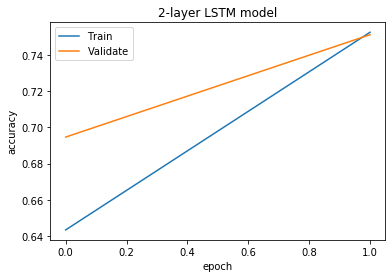

In [11]:
# Plot history for training and validation loss.

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('2-layer LSTM model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

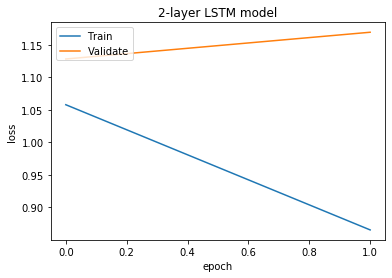

In [12]:
# Plot history for training and validation loss.

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('2-layer LSTM model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

## 2 hidden layers

In [13]:
model_CutIn2 = Sequential()
model_CutIn2.add(LSTM(output_dim=10, batch_input_shape=[batch_size, look_back, dimof_input]))
model_CutIn2.add(Dropout(dropout))
model_CutIn2.add(Dense(30, activation='relu'))
model_CutIn2.add(Dropout(dropout))
model_CutIn2.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_CutIn2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=10)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [14]:
from keras.utils import plot_model

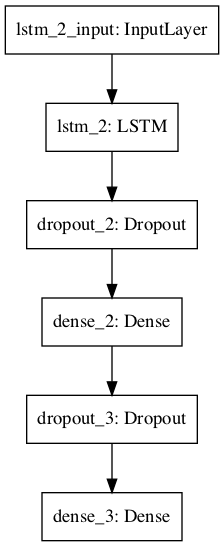

In [15]:
plot_model(model_CutIn2)

In [16]:
history2 = model_CutIn2.fit(
    X_all, Y_all,
    class_weight=weights,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 416736 samples, validate on 416736 samples
Epoch 1/100
416736/416736 [==============================] - 2262s 5ms/step - loss: 1.0263 - accuracy: 0.6332 - val_loss: 1.3415 - val_accuracy: 0.6243
Epoch 2/100
416736/416736 [==============================] - 2400s 6ms/step - loss: 0.8678 - accuracy: 0.7208 - val_loss: 1.4123 - val_accuracy: 0.7211


In [17]:
model_CutIn2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (32, 10)                  1880      
_________________________________________________________________
dropout_2 (Dropout)          (32, 10)                  0         
_________________________________________________________________
dense_2 (Dense)              (32, 30)                  330       
_________________________________________________________________
dropout_3 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_3 (Dense)              (32, 1)                   31        
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


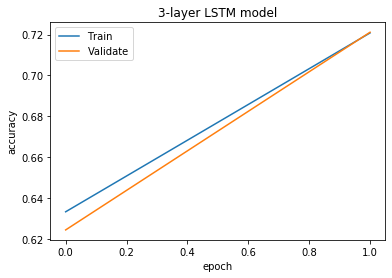

In [17]:
# Plot history for training and validation loss.

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('3-layer LSTM model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

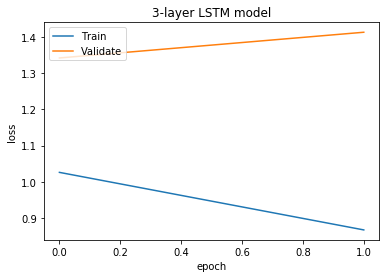

In [18]:
# Plot history for training and validation loss.

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('3-layer LSTM model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [19]:
history2.history

{'val_loss': [1.3414887844431824, 1.4123254835276862],
 'val_accuracy': [0.624323308467865, 0.721123218536377],
 'loss': [1.0263277976288459, 0.8678148636769051],
 'accuracy': [0.63320905, 0.72079206]}

## Model 3

In [20]:
model_CutIn3 = Sequential()
model_CutIn3.add(LSTM(output_dim=10, batch_input_shape=[batch_size, look_back, dimof_input]))
model_CutIn3.add(Dropout(dropout))
model_CutIn3.add(Dense(30, activation='relu'))
model_CutIn3.add(Dropout(dropout))
model_CutIn3.add(Dense(30, activation='relu'))
model_CutIn3.add(Dropout(dropout))
model_CutIn3.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_CutIn3.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=10)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [22]:
model_CutIn3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (32, 10)                  1880      
_________________________________________________________________
dropout_4 (Dropout)          (32, 10)                  0         
_________________________________________________________________
dense_4 (Dense)              (32, 30)                  330       
_________________________________________________________________
dropout_5 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_5 (Dense)              (32, 30)                  930       
_________________________________________________________________
dropout_6 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_6 (Dense)              (32, 1)                  

In [21]:
history3 = model_CutIn3.fit(
    X_all, Y_all,
    class_weight=weights,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 416736 samples, validate on 416736 samples
Epoch 1/100
416736/416736 [==============================] - 2572s 6ms/step - loss: 1.0635 - accuracy: 0.5925 - val_loss: 1.2135 - val_accuracy: 0.6697
Epoch 2/100
416736/416736 [==============================] - 2752s 7ms/step - loss: 0.9186 - accuracy: 0.6682 - val_loss: 1.3968 - val_accuracy: 0.6352


In [22]:
history3.history

{'val_loss': [1.213475360768301, 1.3968340861113488],
 'val_accuracy': [0.6697261333465576, 0.6352319121360779],
 'loss': [1.063486843444204, 0.9186048505665162],
 'accuracy': [0.59247583, 0.66816884]}

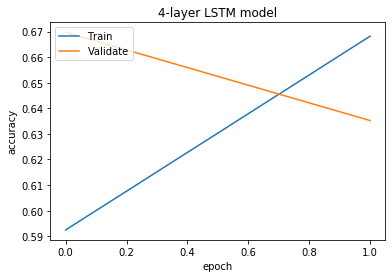

In [23]:
# Plot history for training and validation loss.

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('4-layer LSTM model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

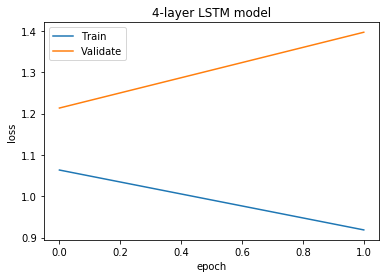

In [24]:
# Plot history for training and validation loss.

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('4-layer LSTM model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

## Model 4

In [6]:
model_CutIn4 = Sequential()
model_CutIn4.add(LSTM(output_dim=10, batch_input_shape=[batch_size, look_back, dimof_input]))
model_CutIn4.add(Dropout(dropout))
model_CutIn4.add(Dense(30, activation='relu'))
model_CutIn4.add(Dropout(dropout))
model_CutIn4.add(Dense(30, activation='relu'))
model_CutIn4.add(Dropout(dropout))
model_CutIn4.add(Dense(10, activation='relu'))
model_CutIn4.add(Dropout(dropout))
model_CutIn4.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_CutIn4.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=10)`
  


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


In [12]:
model_CutIn4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (32, 10)                  1800      
_________________________________________________________________
dropout_4 (Dropout)          (32, 10)                  0         
_________________________________________________________________
dense_4 (Dense)              (32, 30)                  330       
_________________________________________________________________
dropout_5 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_5 (Dense)              (32, 30)                  930       
_________________________________________________________________
dropout_6 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_6 (Dense)              (32, 10)                 

In [7]:
history4 = model_CutIn4.fit(
    X_all, Y_all,
    class_weight=weights,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys



Train on 416736 samples, validate on 416736 samples
Epoch 1/100
416736/416736 [==============================] - 2083s 5ms/step - loss: 1.1477 - accuracy: 0.4759 - val_loss: 1.4311 - val_accuracy: 0.5908
Epoch 2/100
416736/416736 [==============================] - 2278s 5ms/step - loss: 1.0097 - accuracy: 0.5862 - val_loss: 1.1269 - val_accuracy: 0.4994
Epoch 3/100
416736/416736 [==============================] - 2337s 6ms/step - loss: 0.9351 - accuracy: 0.6415 - val_loss: 1.4466 - val_accuracy: 0.6082


In [8]:
history4.history

{'val_loss': [1.4310544289702156, 1.1268565436142521, 1.446616234381726],
 'val_accuracy': [0.5907936692237854, 0.4993545114994049, 0.6082099676132202],
 'loss': [1.1476993419685955, 1.009732874318732, 0.935132349542298],
 'accuracy': [0.4758912, 0.58616245, 0.64147806]}

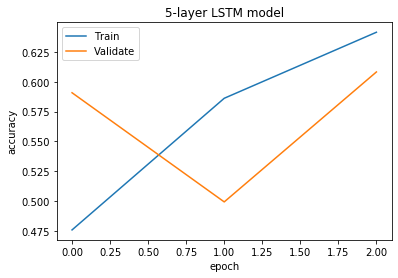

In [9]:
# Plot history for training and validation loss.

plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('5-layer LSTM model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

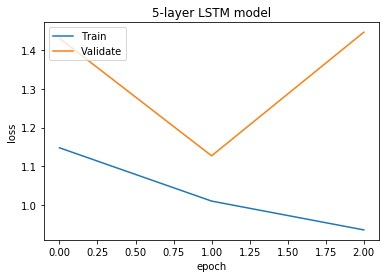

In [10]:
# Plot history for training and validation loss.

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('5-layer LSTM model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [11]:
model_CutIn5 = Sequential()
model_CutIn5.add(LSTM(output_dim=20, batch_input_shape=[batch_size, look_back, dimof_input]))
model_CutIn5.add(Dropout(dropout))
model_CutIn5.add(Dense(40, activation='relu'))
model_CutIn5.add(Dropout(dropout))
model_CutIn5.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_CutIn5.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=20)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [12]:
model_CutIn5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (32, 20)                  3920      
_________________________________________________________________
dropout_5 (Dropout)          (32, 20)                  0         
_________________________________________________________________
dense_5 (Dense)              (32, 40)                  840       
_________________________________________________________________
dropout_6 (Dropout)          (32, 40)                  0         
_________________________________________________________________
dense_6 (Dense)              (32, 1)                   41        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [13]:
history5 = model_CutIn5.fit(
    X_all, Y_all,
    class_weight=weights,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 416736 samples, validate on 416736 samples
Epoch 1/100
416736/416736 [==============================] - 2639s 6ms/step - loss: 0.9855 - accuracy: 0.6489 - val_loss: 1.2046 - val_accuracy: 0.6834
Epoch 2/100
416736/416736 [==============================] - 2705s 6ms/step - loss: 0.8107 - accuracy: 0.7464 - val_loss: 1.1477 - val_accuracy: 0.7347
Epoch 3/100
416736/416736 [==============================] - 2852s 7ms/step - loss: 0.6740 - accuracy: 0.8001 - val_loss: 1.3529 - val_accuracy: 0.7448


In [14]:
history5.history

{'val_loss': [1.204553354195314, 1.147679831241274, 1.3528506965511522],
 'val_accuracy': [0.6833918690681458, 0.7347361445426941, 0.7447712421417236],
 'loss': [0.9855492876669985, 0.8107066508323918, 0.6739673446376166],
 'accuracy': [0.64887124, 0.7463766, 0.80011326]}

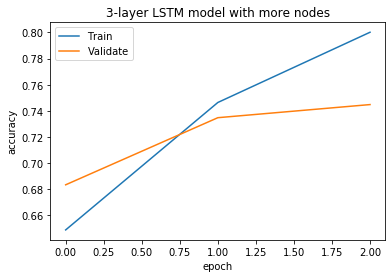

In [17]:
# Plot history for training and validation loss.

plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('3-layer LSTM model with more nodes')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

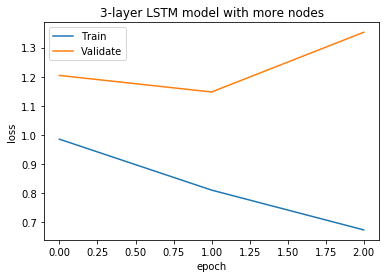

In [16]:
# Plot history for training and validation loss.

plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('3-layer LSTM model with more nodes')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [7]:
model_CutIn6 = Sequential()
model_CutIn6.add(LSTM(output_dim=30, batch_input_shape=[batch_size, look_back, dimof_input]))
model_CutIn6.add(Dropout(dropout))
model_CutIn6.add(Dense(50, activation='relu'))
model_CutIn6.add(Dropout(dropout))
model_CutIn6.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_CutIn6.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=30)`
  


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [8]:
history6 = model_CutIn6.fit(
    X_all, Y_all,
    class_weight=weights,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys



Train on 416736 samples, validate on 416736 samples
Epoch 1/100
416736/416736 [==============================] - 2376s 6ms/step - loss: 0.8940 - accuracy: 0.7027 - val_loss: 1.3323 - val_accuracy: 0.7240
Epoch 2/100
416736/416736 [==============================] - 2626s 6ms/step - loss: 0.6454 - accuracy: 0.8107 - val_loss: 1.6488 - val_accuracy: 0.7575


In [22]:
model_CutIn6.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (32, 30)                  7080      
_________________________________________________________________
dropout_7 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_7 (Dense)              (32, 50)                  1550      
_________________________________________________________________
dropout_8 (Dropout)          (32, 50)                  0         
_________________________________________________________________
dense_8 (Dense)              (32, 1)                   51        
Total params: 8,681
Trainable params: 8,681
Non-trainable params: 0
_________________________________________________________________


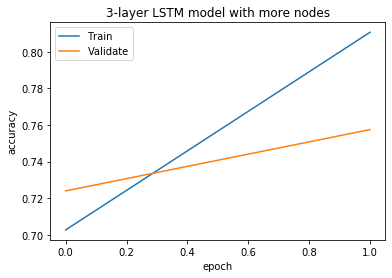

In [9]:
# Plot history for training and validation loss.

plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('3-layer LSTM model with more nodes')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

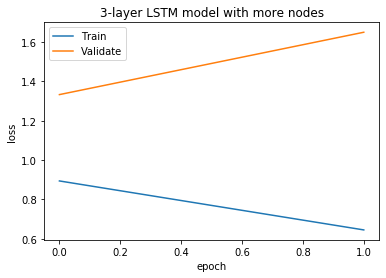

In [10]:
# Plot history for training and validation loss.

plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('3-layer LSTM model with more nodes')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [15]:
model_CutIn7 = Sequential()
model_CutIn7.add(LSTM(output_dim=40, batch_input_shape=[batch_size, look_back, dimof_input]))
model_CutIn7.add(Dropout(dropout))
model_CutIn7.add(Dense(60, activation='relu'))
model_CutIn7.add(Dropout(dropout))
model_CutIn7.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_CutIn7.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=40)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [16]:
model_CutIn7.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (32, 40)                  11040     
_________________________________________________________________
dropout_3 (Dropout)          (32, 40)                  0         
_________________________________________________________________
dense_3 (Dense)              (32, 60)                  2460      
_________________________________________________________________
dropout_4 (Dropout)          (32, 60)                  0         
_________________________________________________________________
dense_4 (Dense)              (32, 1)                   61        
Total params: 13,561
Trainable params: 13,561
Non-trainable params: 0
_________________________________________________________________


In [17]:
history7 = model_CutIn7.fit(
    X_all, Y_all,
    class_weight=weights,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 416736 samples, validate on 416736 samples
Epoch 1/100
416736/416736 [==============================] - 2753s 7ms/step - loss: 0.8620 - accuracy: 0.7154 - val_loss: 1.4487 - val_accuracy: 0.7304
Epoch 2/100
416736/416736 [==============================] - 2826s 7ms/step - loss: 0.6127 - accuracy: 0.8152 - val_loss: 1.5776 - val_accuracy: 0.7394


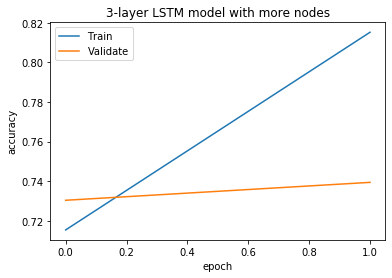

In [18]:
# Plot history for training and validation loss.

plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('3-layer LSTM model with more nodes')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

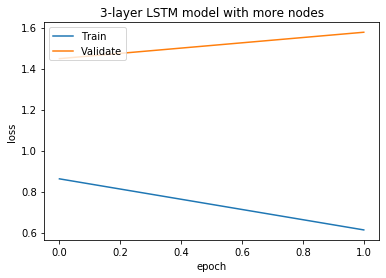

In [19]:
# Plot history for training and validation loss.

plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('3-layer LSTM model with more nodes')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [ ]:
# Plot history for training and validation loss.

plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.plot(history4.history['accuracy'])
plt.plot(history5.history['accuracy'])
plt.plot(history6.history['accuracy'])
plt.plot(history7.history['accuracy'])
plt.title('model accuracy with replacing missing data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [ ]:
# Plot history for training and validation loss.

plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('model accuracy with replacing missing data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [8]:
model_CutIn8 = Sequential()
model_CutIn8.add(LSTM(output_dim=30, batch_input_shape=[batch_size, look_back, dimof_input]))
model_CutIn8.add(Dropout(dropout))
model_CutIn8.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_CutIn8.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=30)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
model_CutIn8.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (32, 30)                  7080      
_________________________________________________________________
dropout_1 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_1 (Dense)              (32, 1)                   31        
Total params: 7,111
Trainable params: 7,111
Non-trainable params: 0
_________________________________________________________________


In [10]:
history8 = model_CutIn8.fit(
    X_all, Y_all,
    class_weight=weights,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys



Train on 365440 samples, validate on 365440 samples
Epoch 1/100
365440/365440 [==============================] - 1866s 5ms/step - loss: 0.8602 - accuracy: 0.7375 - val_loss: 1.1869 - val_accuracy: 0.7936
Epoch 2/100
365440/365440 [==============================] - 1998s 5ms/step - loss: 0.6123 - accuracy: 0.8365 - val_loss: 1.3628 - val_accuracy: 0.8014


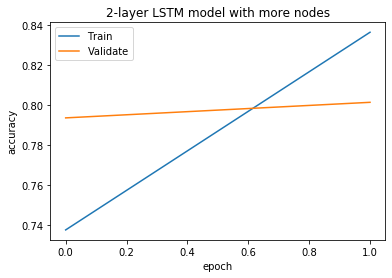

In [11]:
# Plot history for training and validation loss.

plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])
plt.title('2-layer LSTM model with more nodes')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

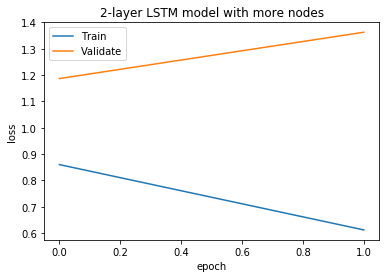

In [12]:
# Plot history for training and validation loss.

plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('2-layer LSTM model with more nodes')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [15]:
model_CutIn9 = Sequential()
model_CutIn9.add(LSTM(output_dim=50, batch_input_shape=[batch_size, look_back, dimof_input]))
model_CutIn9.add(Dropout(dropout))
model_CutIn9.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_CutIn9.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=50)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [16]:
history9 = model_CutIn9.fit(
    X_all, Y_all,
    class_weight=weights,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 365440 samples, validate on 365440 samples
Epoch 1/100
365440/365440 [==============================] - 2247s 6ms/step - loss: 0.8635 - accuracy: 0.7347 - val_loss: 1.0711 - val_accuracy: 0.7812
Epoch 2/100
365440/365440 [==============================] - 2241s 6ms/step - loss: 0.6035 - accuracy: 0.8323 - val_loss: 1.3069 - val_accuracy: 0.8154


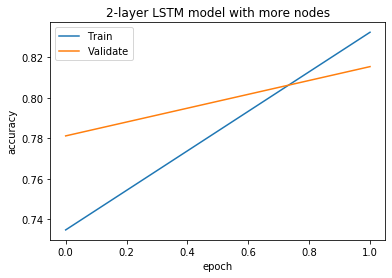

In [17]:
# Plot history for training and validation loss.

plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])
plt.title('2-layer LSTM model with more nodes')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

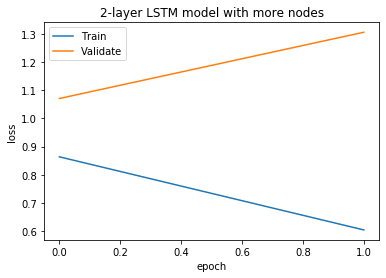

In [18]:
# Plot history for training and validation loss.

plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.title('2-layer LSTM model with more nodes')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [21]:
model_CutIn10 = Sequential()
model_CutIn10.add(LSTM(output_dim=60, batch_input_shape=[batch_size, look_back, dimof_input]))
model_CutIn10.add(Dropout(dropout))
model_CutIn10.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_CutIn10.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=60)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [22]:
history10 = model_CutIn10.fit(
    X_all, Y_all,
    class_weight=weights,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 365440 samples, validate on 365440 samples
Epoch 1/100
365440/365440 [==============================] - 2479s 7ms/step - loss: 0.8445 - accuracy: 0.7436 - val_loss: 1.2839 - val_accuracy: 0.7675
Epoch 2/100
365440/365440 [==============================] - 2560s 7ms/step - loss: 0.5970 - accuracy: 0.8375 - val_loss: 1.3256 - val_accuracy: 0.8003


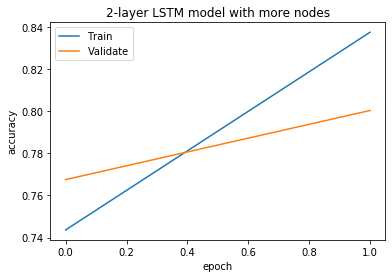

In [23]:
# Plot history for training and validation loss.

plt.plot(history10.history['accuracy'])
plt.plot(history10.history['val_accuracy'])
plt.title('2-layer LSTM model with more nodes')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

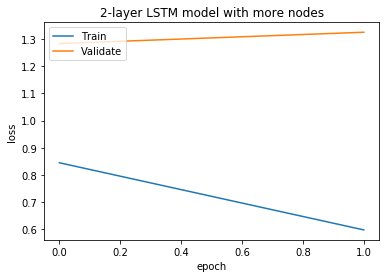

In [24]:
# Plot history for training and validation loss.

plt.plot(history10.history['loss'])
plt.plot(history10.history['val_loss'])
plt.title('2-layer LSTM model with more nodes')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

## serialize model to JSON
https://machinelearningmastery.com/save-load-keras-deep-learning-models/

In [19]:
model_json = model_CutIn9.to_json()
with open("CutInVolvo9.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model_CutIn9.save_weights("CutInVolvo9_weights.h5")
print("Saved model to disk")

Saved model to disk


## Save Model Weights and Architecture Together

In [20]:
#model_Flow1.save("TrafficNetToVolvo_FlowMaskingSparse-1.h5")
model_CutIn9.save("CutInVolvo9.h5")
print("Saved model to disk")

Saved model to disk


## Predict for volvo data, code from previous 6.1

In [25]:
volvo = pd.read_csv('../TrafficNet/VolvoData/2019w26_CPUload_Kiel_Amsterdam-0011.csv', usecols=['Lat','Long','Lane','Velocity','PosLgt2','PosLgt3','VelLgt1','VelLgt2','VelLgt3','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Id1','Id2','Lane1','PositionInLane1','PositionInLane2','PositionInLane3','Lead','CutIn'])
volvo.fillna(-1, inplace=True)

Yvolvo = np.array(volvo['CutIn'].values)
Xvolvo = np.array(volvo[['Lat','Long','Lane','Velocity','PosLgt2','PosLgt3','VelLgt1','VelLgt2','VelLgt3','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Id1','Id2','Lane1','PositionInLane1','PositionInLane2','PositionInLane3','Lead']])
    
# Scale/whiten the X data
scaler = StandardScaler()
X_volvo = scaler.fit_transform(Xvolvo)
XP_volvo, YP_volvo = create_dataset(X_volvo, Yvolvo, look_back=look_back)

(len(XP_volvo)//64)*64

139520

In [26]:
XPP_volvo = XP_volvo[:139520]
YPP_volvo = YP_volvo[:139520]

In [27]:
from datetime import datetime
start=datetime.now()
Y_predict_volvo = model_CutIn9.predict_classes(XPP_volvo, verbose=True)
print(datetime.now()-start)

#equal_arrays_volvo = (Y_predict_volvo == YPP_volvo).all(axis=1)
#acc_volvo = np.count_nonzero(equal_arrays_volvo == True)/len(equal_arrays_volvo)
a = Y_predict_volvo.tolist()
a2 = [item[0] for item in a]
b = YPP_volvo.tolist()
equal_arrays_volvo = [i for i, (x, y) in enumerate(zip(a2, b)) if x == y]
acc_volvo = len(equal_arrays_volvo)/len(a2)
print(acc_volvo)

139520/139520 [==============================] - 169s 1ms/step
0:02:49.150883
0.7462299311926606


In [28]:
f = open("predict_CutInVolvo9.csv", "w")

for index in range(len(a2)):
    f.write(str(a2[index]) + "," + str(b[index]) + "\n")
f.close()

## 7.3

In [15]:
model_CutIn2 = Sequential()
model_CutIn2.add(LSTM(output_dim=256, batch_input_shape=[batch_size, look_back, dimof_input]))
model_CutIn2.add(Dropout(dropout))
model_CutIn2.add(Dense(100, activation='relu'))
model_CutIn2.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_CutIn2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=256)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  """


In [16]:
model_CutIn2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (32, 256)                 290816    
_________________________________________________________________
dropout_4 (Dropout)          (32, 256)                 0         
_________________________________________________________________
dense_2 (Dense)              (32, 100)                 25700     
_________________________________________________________________
dense_3 (Dense)              (32, 1)                   101       
Total params: 316,617
Trainable params: 316,617
Non-trainable params: 0
_________________________________________________________________


In [17]:
history2 = model_CutIn2.fit(
    X_all, Y_all,
    class_weight=weights,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 305344 samples, validate on 305344 samples
Epoch 1/100
305344/305344 [==============================] - 3942s 13ms/step - loss: 0.9340 - accuracy: 0.8062 - val_loss: 2.5660 - val_accuracy: 0.7794
Epoch 2/100
305344/305344 [==============================] - 4183s 14ms/step - loss: 0.4449 - accuracy: 0.9037 - val_loss: 2.7474 - val_accuracy: 0.8797


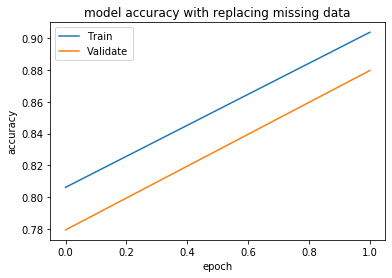

In [18]:
# Plot history for training and validation loss.

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy with replacing missing data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

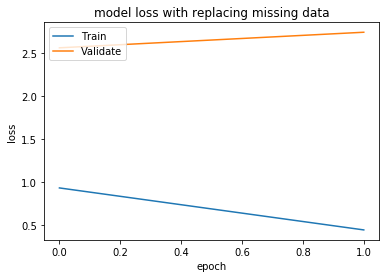

In [19]:
# Plot history for training and validation loss.

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss with replacing missing data')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

## 7.7.1

In [8]:
model_CutIn3 = Sequential()
model_CutIn3.add(LSTM(output_dim=100, batch_input_shape=[batch_size, look_back, dimof_input]))
model_CutIn3.add(Dropout(dropout))
model_CutIn3.add(Dense(100, activation='relu'))
model_CutIn3.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_CutIn3.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=100)`
  


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  """


In [9]:
model_CutIn3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (32, 100)                 51200     
_________________________________________________________________
dropout_1 (Dropout)          (32, 100)                 0         
_________________________________________________________________
dense_1 (Dense)              (32, 100)                 10100     
_________________________________________________________________
dense_2 (Dense)              (32, 1)                   101       
Total params: 61,401
Trainable params: 61,401
Non-trainable params: 0
_________________________________________________________________


In [10]:
history3 = model_CutIn3.fit(
    X_all, Y_all,
    class_weight=weights,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys



Train on 305344 samples, validate on 305344 samples
Epoch 1/100
305344/305344 [==============================] - 2568s 8ms/step - loss: 0.7229 - accuracy: 0.8543 - val_loss: 2.2043 - val_accuracy: 0.7578
Epoch 2/100
305344/305344 [==============================] - 2531s 8ms/step - loss: 0.3957 - accuracy: 0.9095 - val_loss: 4.2323 - val_accuracy: 0.9326


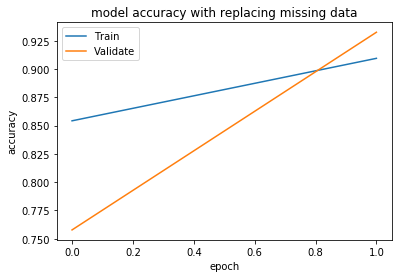

In [11]:
# Plot history for training and validation loss.

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy with replacing missing data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

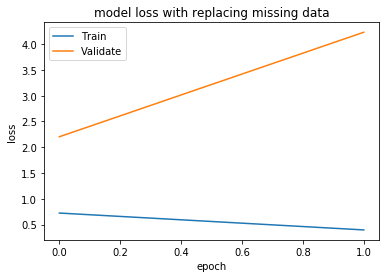

In [12]:
# Plot history for training and validation loss.

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss with replacing missing data')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

## serialize model to JSON
https://machinelearningmastery.com/save-load-keras-deep-learning-models/

In [13]:
model_json2 = model_CutIn2.to_json()
with open("1DY_CutInReplacingSparse-1.json", "w") as json_file:
    json_file.write(model_json2)
    
# serialize weights to HDF5
model_CutIn2.save_weights("1DY_weights_CutInReplacingSparse-1.h5")
print("Saved model to disk")

Saved model to disk


## Save Model Weights and Architecture Together

In [14]:
#model_Flow1.save("TrafficNetToVolvo_FlowMaskingSparse-1.h5")
model_CutIn2.save("1DY_CutInReplacingSparse-1.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model

# load model
model = load_model('model.h5')
# summarize model.
model.summary()
# load dataset
dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# evaluate the model
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

In [ ]:
# Write predictions to disk

data1988.to_csv("TrafficNetToVolvo-6.1-CutIn-Masking_PredictionResult.csv", encoding='utf_8_sig', index=False)